#1


LDA Accuracy: 0.8444444444444444
LDA Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.62      0.70        13
           2       0.69      0.85      0.76        13

    accuracy                           0.84        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.85      0.84      0.84        45


QDA Accuracy: 0.8
QDA Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



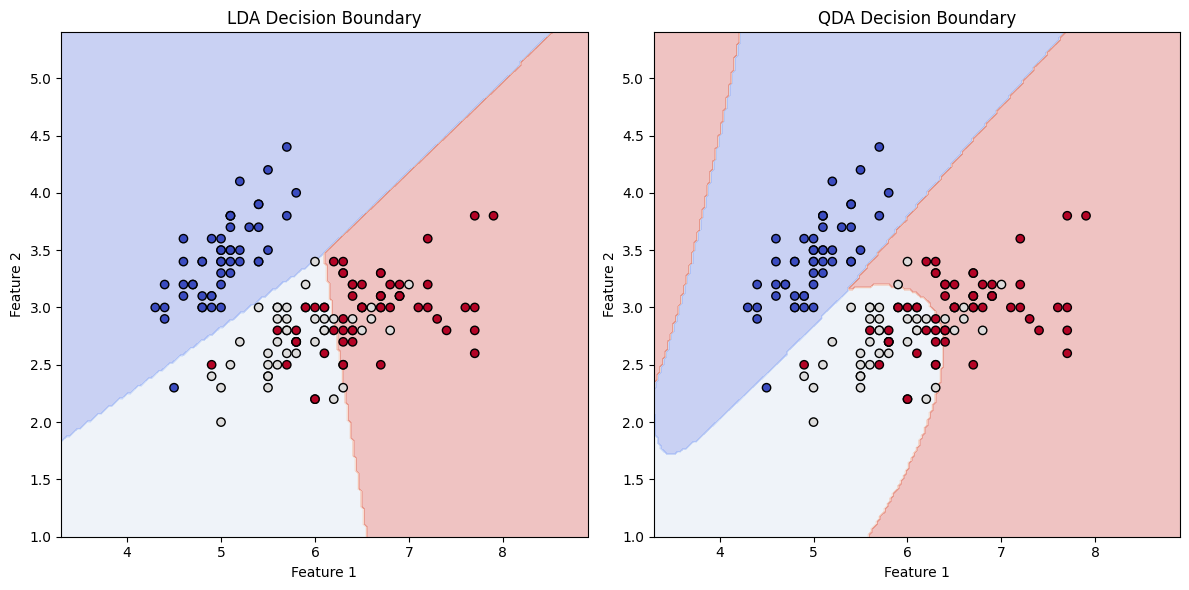

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
data = load_iris()
X = data.data[:, :2]  # Use the first two features for visualization
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train LDA and QDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Evaluate LDA
lda_predictions = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("LDA Accuracy:", lda_accuracy)
print("LDA Classification Report:\n", classification_report(y_test, lda_predictions))

# Evaluate QDA
qda_predictions = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("\nQDA Accuracy:", qda_accuracy)
print("QDA Classification Report:\n", classification_report(y_test, qda_predictions))

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid for LDA and QDA
lda_grid_predictions = lda.predict(grid).reshape(xx.shape)
qda_grid_predictions = qda.predict(grid).reshape(xx.shape)

# Plot LDA Decision Boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, lda_grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("LDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot QDA Decision Boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, qda_grid_predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("QDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


#2


Initial Accuracy (Unpruned Tree): 1.0
Best Accuracy (Pruned Tree): 1.0


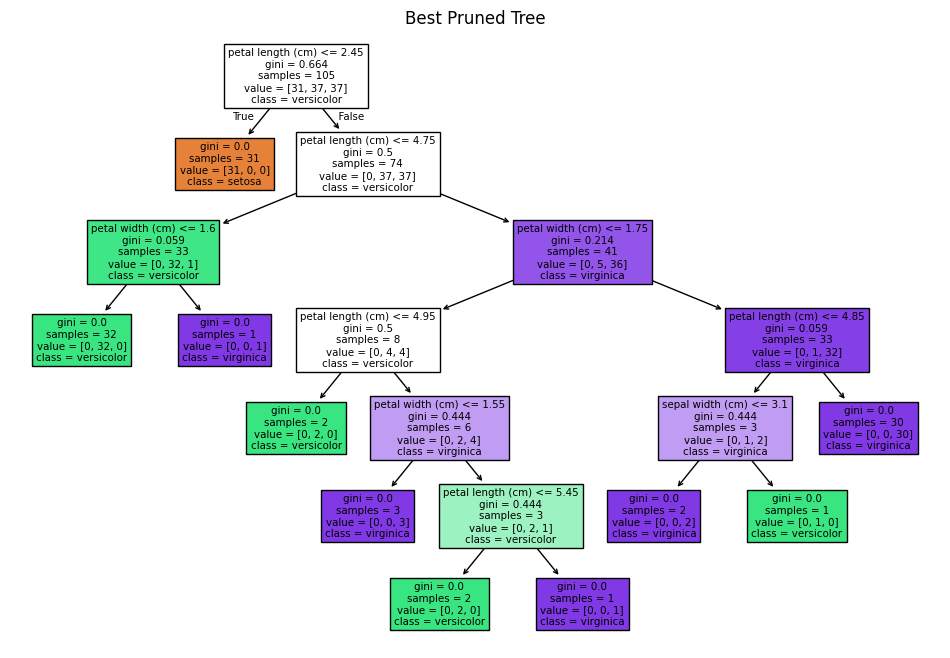

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)

path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

pruned_trees = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

accuracies = [accuracy_score(y_test, tree.predict(X_test)) for tree in pruned_trees]

best_index = accuracies.index(max(accuracies))
best_tree = pruned_trees[best_index]
best_accuracy = accuracies[best_index]

print("Initial Accuracy (Unpruned Tree):", initial_accuracy)
print("Best Accuracy (Pruned Tree):", best_accuracy)

plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Best Pruned Tree")
plt.show()


#3


In [ ]:
import numpy as np

def load_dataset():
    dataset = [
        ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
        ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
        ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
        ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
    ]
    X = np.array([row[:-1] for row in dataset])
    y = np.array([row[-1] for row in dataset])
    return X, y

def candidate_elimination(X, y):
    specific_hypothesis = X[0]
    general_hypotheses = [['?' for _ in range(len(specific_hypothesis))] for _ in range(len(specific_hypothesis))]

    for i, instance in enumerate(X):
        if y[i] == 'Yes':
            for j in range(len(specific_hypothesis)):
                if specific_hypothesis[j] != instance[j]:
                    specific_hypothesis[j] = '?'
            general_hypotheses = [h for h in general_hypotheses if all(h[k] == '?' or h[k] == instance[k] for k in range(len(h)))]
        elif y[i] == 'No':
            for j in range(len(instance)):
                if specific_hypothesis[j] != instance[j] and specific_hypothesis[j] != '?':
                    new_hypothesis = ['?' if k != j else specific_hypothesis[k] for k in range(len(instance))]
                    if new_hypothesis not in general_hypotheses:
                        general_hypotheses.append(new_hypothesis)
            general_hypotheses = [h for h in general_hypotheses if not all(h[k] == '?' or h[k] == instance[k] for k in range(len(h)))]

    general_hypotheses = [h for h in general_hypotheses if any(val != '?' for val in h)]
    return specific_hypothesis, general_hypotheses

X, y = load_dataset()
specific_h, general_h = candidate_elimination(X, y)

print("Specific Hypothesis:", specific_h)
print("General Hypotheses:", general_h)


Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' '?' '?']
General Hypotheses: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


#4


Mean Absolute Error: 0.2948356875064906


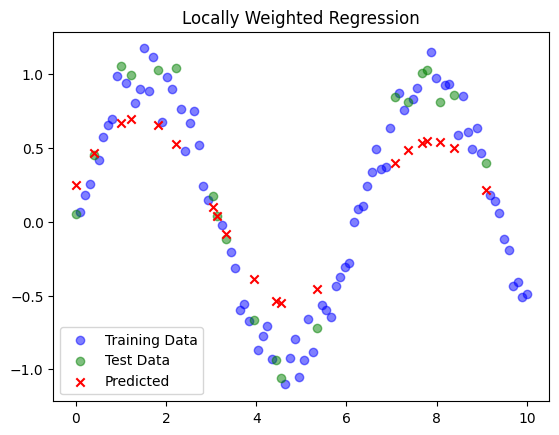

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def gaussian_kernel(distance, tau):
    return np.exp(-distance**2 / (2 * tau**2))

def locally_weighted_regression(X_train, y_train, x_query, tau):
    weights = np.array([gaussian_kernel(np.linalg.norm(x_query - x), tau) for x in X_train])
    W = np.diag(weights)
    X_b = np.c_[np.ones(X_train.shape[0]), X_train]
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y_train
    return np.dot([1, *x_query], theta)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tau = 1.0

y_pred = np.array([locally_weighted_regression(X_train, y_train, x, tau) for x in X_test])

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.scatter(X_train, y_train, color='blue', alpha=0.5)
plt.scatter(X_test, y_test, color='green', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', marker='x')
plt.title("Locally Weighted Regression")
plt.legend(["Training Data", "Test Data", "Predicted"])
plt.show()


#5

In [ ]:
import numpy as np
import pandas as pd
from math import log2

def entropy(data):
    classes, counts = np.unique(data, return_counts=True)
    total = np.sum(counts)
    return -sum((count / total) * log2(count / total) for count in counts)

def information_gain(data, feature, target):
    total_entropy = entropy(target)
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / np.sum(counts)) * entropy(target[data[feature] == values[i]]) for i in range(len(values)))
    return total_entropy - weighted_entropy

def id3(data, features, target, parent_value=None):
    if len(np.unique(target)) == 1:
        return np.unique(target)[0]
    if len(data) == 0 or len(features) == 0:
        return np.unique(parent_value, return_counts=True)[0][0]
    parent_value = target
    gains = {feature: information_gain(data, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)
    tree = {best_feature: {}}
    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        subtree = id3(subset, [f for f in features if f != best_feature], subset[target.name])
        tree[best_feature][value] = subtree
    return tree

data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

features = list(data.columns[:-1])
target = data['Play']
tree = id3(data, features, target)

print("Decision Tree:")
print(tree)


Decision Tree:
{'Outlook': {'Overcast': 'Yes', 'Rainy': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


#6


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM model: {accuracy * 100:.2f}%')


Accuracy of the SVM model: 100.00%


#7


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = {
    'text': [
        "Fox News reports an economic boom under new policies.",
        "A shocking crime was reported in a small town.",
        "Fox News praises the efforts of local firefighters.",
        "Criticism arises over controversial government policies.",
        "Fox News highlights the challenges faced by rural communities.",
        "A heartwarming story of a rescued puppy was shared.",
        "Concerns grow over rising inflation and its effects.",
        "Fox News celebrates a new space exploration milestone.",
        "Debate intensifies over recent healthcare reforms.",
        "A new tech startup is gaining attention for innovation."
    ],
    'sentiment': [
        "positive", "negative", "positive", "negative",
        "neutral", "positive", "negative", "positive",
        "negative", "positive"
    ]
}

df = pd.DataFrame(data)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

new_data = [
    "Fox News celebrates the opening of a new hospital.",
    "Controversy arises over a recent budget cut."
]
new_data_tfidf = vectorizer.transform(new_data)
predictions = model.predict(new_data_tfidf)

for text, sentiment in zip(new_data, predictions):
    print(f"Text: '{text}' => Sentiment: {sentiment}")


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Text: 'Fox News celebrates the opening of a new hospital.' => Sentiment: 1
Text: 'Controversy arises over a recent budget cut.' => Sentiment: 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

#8

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

correct_predictions = [(X_test[i], y_test[i], y_pred[i]) for i in range(len(y_test)) if y_test[i] == y_pred[i]]
wrong_predictions = [(X_test[i], y_test[i], y_pred[i]) for i in range(len(y_test)) if y_test[i] != y_pred[i]]

print("\nCorrect Predictions:")
for correct in correct_predictions:
    print(f"Data: {correct[0]}, Actual: {correct[1]}, Predicted: {correct[2]}")

print("\nWrong Predictions:")
for wrong in wrong_predictions:
    print(f"Data: {wrong[0]}, Actual: {wrong[1]}, Predicted: {wrong[2]}")


Accuracy: 100.00%

Correct Predictions:
Data: [ 0.35451684 -0.58505976  0.55777524  0.02224751], Actual: 1, Predicted: 1
Data: [-0.13307079  1.65083742 -1.16139502 -1.17911778], Actual: 0, Predicted: 0
Data: [ 2.30486738 -1.0322392   1.8185001   1.49058286], Actual: 2, Predicted: 2
Data: [ 0.23261993 -0.36147005  0.44316389  0.4227026 ], Actual: 1, Predicted: 1
Data: [ 1.2077952  -0.58505976  0.61508092  0.28921757], Actual: 1, Predicted: 1
Data: [-0.49876152  0.75647855 -1.27600637 -1.04563275], Actual: 0, Predicted: 0
Data: [-0.2549677  -0.36147005 -0.07258719  0.15573254], Actual: 1, Predicted: 1
Data: [1.32969211 0.08570939 0.78699794 1.49058286], Actual: 2, Predicted: 2
Data: [ 0.47641375 -1.92659808  0.44316389  0.4227026 ], Actual: 1, Predicted: 1
Data: [-0.01117388 -0.80864948  0.09932984  0.02224751], Actual: 1, Predicted: 1
Data: [0.84210448 0.30929911 0.78699794 1.09012776], Actual: 2, Predicted: 2
Data: [-1.23014297 -0.13788033 -1.33331205 -1.44608785], Actual: 0, Predicted

#9

In [ ]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate synthetic heart disease dataset
np.random.seed(42)

# Feature generation
n_samples = 1000
age = np.random.randint(20, 80, n_samples)  # Age between 20 and 80
cholesterol = np.random.randint(150, 300, n_samples)  # Cholesterol level between 150 and 300
blood_pressure = np.random.randint(100, 180, n_samples)  # Blood pressure between 100 and 180
gender = np.random.choice([0, 1], n_samples)  # 0 for female, 1 for male
exercise = np.random.choice([0, 1], n_samples)  # 0 for no exercise, 1 for regular exercise
heart_disease = np.random.choice([0, 1], n_samples)  # 0 for no disease, 1 for disease

# Combine into a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Cholesterol': cholesterol,
    'Blood_Pressure': blood_pressure,
    'Gender': gender,
    'Exercise': exercise,
    'Heart_Disease': heart_disease
})

# Step 2: Preprocess the dataset (No missing values, already in numerical format)
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Step 3: Split dataset into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Naive Bayes (GaussianNB) classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Print classification report for detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display some predictions
print("\nExample Predictions:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")


Accuracy of the model: 46.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        96
           1       0.48      0.40      0.44       104

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200


Example Predictions:
Predicted: 1, Actual: 0
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1


#10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

np.random.seed(42)

n_samples = 1000
age = np.random.randint(18, 80, n_samples)
blood_pressure = np.random.randint(80, 180, n_samples)
serum_creatinine = np.random.uniform(0.5, 3.0, n_samples)
blood_sugar = np.random.randint(70, 200, n_samples)
protein_in_urine = np.random.choice([0, 1], n_samples)
age_group = np.random.choice([0, 1], n_samples)
kidney_disease = np.random.choice([0, 1], n_samples)

data = pd.DataFrame({
    'Age': age,
    'Blood_Pressure': blood_pressure,
    'Serum_Creatinine': serum_creatinine,
    'Blood_Sugar': blood_sugar,
    'Protein_in_Urine': protein_in_urine,
    'Age_Group': age_group,
    'Kidney_Disease': kidney_disease
})

X = data.drop('Kidney_Disease', axis=1)
y = data['Kidney_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 42.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.56      0.49        99
           1       0.41      0.30      0.34       101

    accuracy                           0.42       200
   macro avg       0.42      0.43      0.42       200
weighted avg       0.42      0.42      0.42       200



#appendice

In [ ]:
import numpy as np

# Sample Dataset: [Sky, Temp, Humidity, Wind, Water, Forecast], Target
data = np.array([
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
])

# Split attributes and target
X, y = data[:, :-1], data[:, -1]

# Initialize S (Specific) and G (General) hypotheses
S = X[0].copy()
G = np.array([['?' for _ in range(len(S))]])

# Candidate Elimination Algorithm
for i, sample in enumerate(X):
    if y[i] == 'Yes':  # Positive example
        G = np.array([g for g in G if all(s == '?' or s == x for s, x in zip(g, sample))])
        S = [s if s == x else '?' for s, x in zip(S, sample)]
    else:  # Negative example
        G = np.vstack([g for g in G for j in range(len(S))
                       if g[j] == '?' or (g[j] != S[j] and g[j] != sample[j])])

# Print results
print("Final Specific Hypothesis (S):", S)
print("Final General Hypotheses (G):", G)


Final Specific Hypothesis (S): ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final General Hypotheses (G): [['?' '?' '?' '?' '?' '?']
 ['?' '?' '?' '?' '?' '?']
 ['?' '?' '?' '?' '?' '?']
 ['?' '?' '?' '?' '?' '?']
 ['?' '?' '?' '?' '?' '?']
 ['?' '?' '?' '?' '?' '?']]


In [ ]:
import